# Script for export MPALM detection movie 

In [1]:
import h5py
import nd2
import numpy as np
from os import path
from skimage.color import label2rgb
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2024/20240303_U2OS_1xNLS_PA646_MPALM_dyeOnGlass/'
# ND2_img_name = '20240303_Clust02_1xNLS_25nMPA646_30p5ms_2kframe_001.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2024/20240303_U2OS_1xNLS_PA646_MPALM_dyeOnGlass/20240303_Clust02_1xNLS_Cell01/'
# matfile_name = 'Blurdata_UNet_mask_MBX_20240620_2035_epoch20_Ch1.mat'

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2024/20240602_U2OS_FOXA2_MPALM/'
# ND2_img_name = '20240602_Clust01_U2OS_FOXA2_25uMPA646_30p5ms_10kframe_001.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2024/20240602_U2OS_FOXA2_MPALM/20240602_Clust01_U2OS_FOXA2_25uMPA646_30p5ms_10kframe_001_Cell01/'
# matfile_name = 'Blurdata_UNet_mask_MBX_20231203_1016_epoch5_Ch1.mat'

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2023/20231013_U2OS_H2BOnly_HP1-H2B_mPALM/EF1a-H2B/'
# ND2_img_name = '20231013_Clust01_EF1a-H2B_642_25uMPA646_30p5ms_20kframe_01.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2023/20231013_U2OS_H2BOnly_HP1-H2B_mPALM/EF1a-H2B/20231013_Clust01_EF1a-H2B_642_25uMPA646_30p5ms_20kframe_01_Cell01/'
# matfile_name = 'Blurdata_UNet_mask_MBX_20240620_2035_epoch20_Ch1.mat'

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2023/20231013_U2OS_H2BOnly_HP1-H2B_mPALM/EF1a-H2B/'
# ND2_img_name = '20231013_Clust02_EF1a-H2B_642_25uMPA646_30p5ms_20kframe_02.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2023/20231013_U2OS_H2BOnly_HP1-H2B_mPALM/EF1a-H2B/20231013_Clust02_EF1a-H2B_642_25uMPA646_30p5ms_20kframe_02_Cell01/'
# matfile_name = 'Blurdata_UNet_mask_MBX_20240620_2035_epoch20_Ch1.mat'

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2024/20240320_U2OS_EF1a_H2B-Halo_PA646_DRB_FLA/30p5ms/'
# ND2_img_name = '20240320_Clust01_H2B_DMSO_30p5ms_2kframe_01.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2024/20240320_U2OS_EF1a_H2B-Halo_PA646_DRB_FLA/30p5ms/20240320_Clust01_H2B_DMSO_Cell01/'
# matfile_name = 'Blurdata_UNet_mask_MBX_20240620_2035_epoch20_Ch1.mat'

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2024/20240808_U2OS_HaloOnly_10ms_MPALM/'
# ND2_img_name = '20240808_Clust01_U2OS_HaloOnly_10p5ms_2kframe_001.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2024/20240808_U2OS_HaloOnly_10ms_MPALM/20240808_Clust01_U2OS_HaloOnly_Cell01/'
# matfile_name = 'Blurdata_UNet_mask_MBX_20240620_2035_epoch20_Ch1_Slice01.mat'

# ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2024/20240813_U2OS_CD9-mEosEM_MPALM/'
# ND2_img_name = '20240813_Clust01_CD9mEosEM_30p5ms_1kframe_002.nd2'

# matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2024/20240813_U2OS_CD9-mEosEM_MPALM/20240813_Clust01_CD9mEosEM_Cell01/'
# matfile_name = 'Blurdata_NoLocFilter_UNet_mask_MBX_20240620_2035_epoch20_Ch1_Slice01.mat'

ND2_img_dir = '/dataB/SPT_raw_backup/ZuhuiWang/2024/20240902_U2OS_TMsignal-OPRM1_PA646_MPALM/'
ND2_img_name = '20240902_Clust05_U2OS_OPRM1_DAMGO1hr_30ms_2kframe_001.nd2'

matfile_dir = '/mnt/disk1/WZH-DataCenter/PROCESS-SPT/2024/20240902_U2OS_TMsignal-OPRM1_PA646_MPALM/20240902_Clust05_U2OS_OPRM1_DAMGO1hr_Cell01/'
matfile_name = 'Blurdata_NoLocFilter_UNet_mask_MBX_20240620_2035_epoch20_Ch1_Slice01.mat'



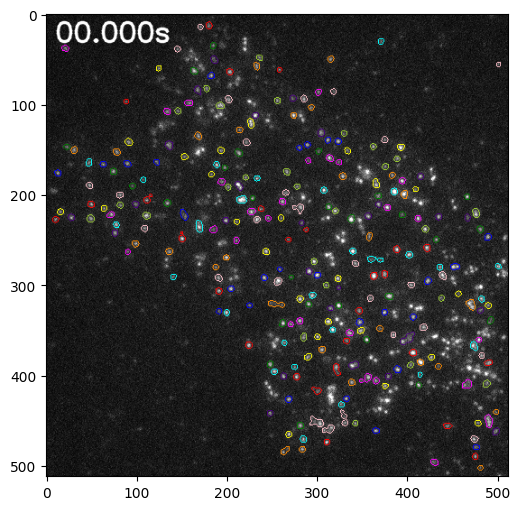

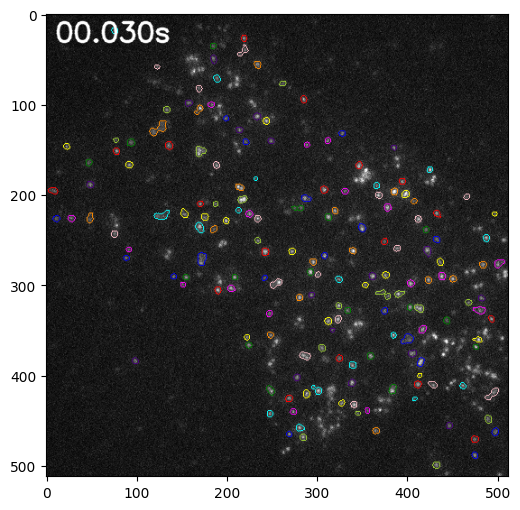

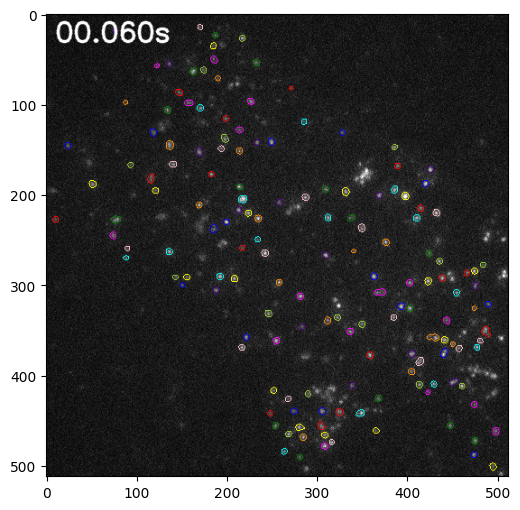

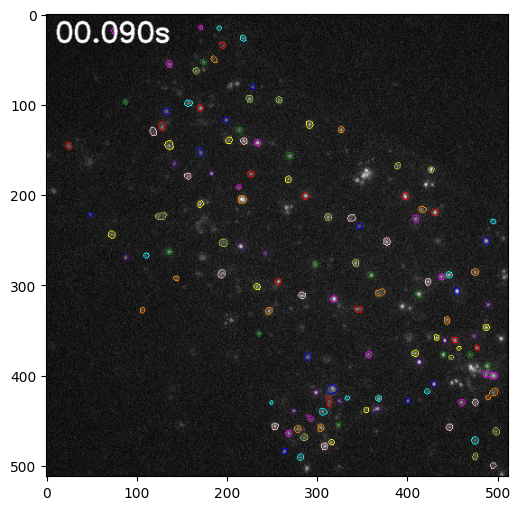

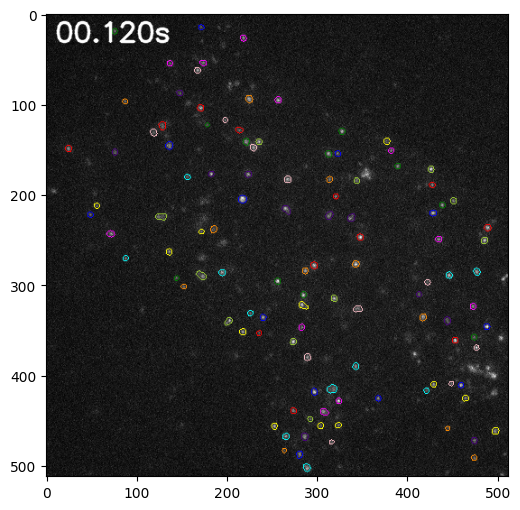

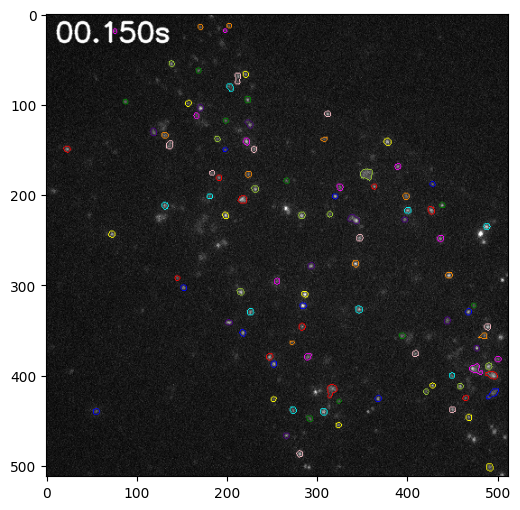

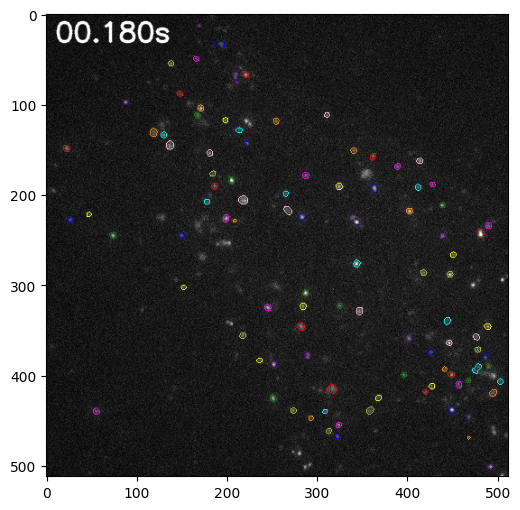

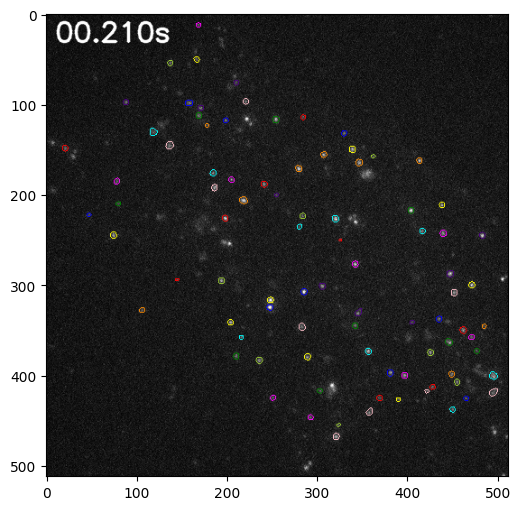

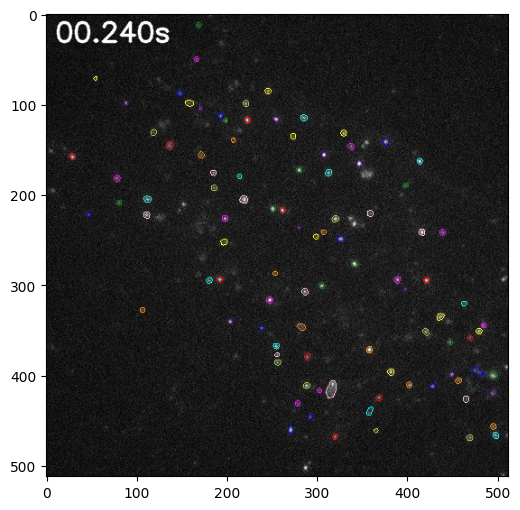

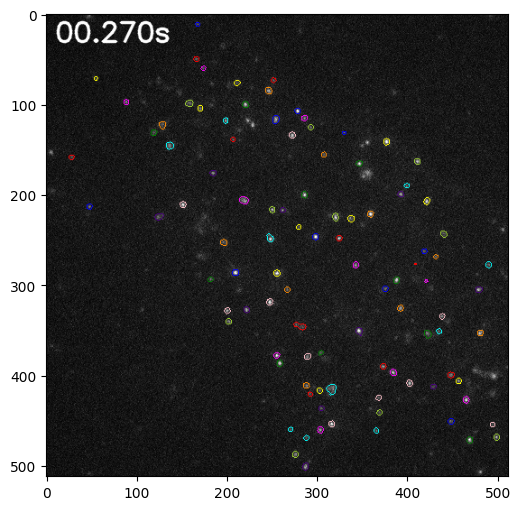

In [2]:
import cv2
from datetime import datetime

datafile = path.join(matfile_dir,matfile_name)
ND2File = path.join(ND2_img_dir,ND2_img_name)
with h5py.File(datafile, 'r') as matfile:
    # matfile = h5py.File(datafile, 'r')
    # Access the data
    cell_PSF = matfile['cell_PSF']
    # total_frame_num = cell_PSF['xyI'][0].size
    total_frame_num = int(matfile['impars']['tot_img_num'][0][0])

    ND2_img = nd2.imread(ND2File)
    frame_width = ND2_img.shape[1]      # Width of the frames
    frame_height = ND2_img.shape[2]     # Height of the frames      
                    
    for iFrame in range(0,10):
        img = ND2_img[iFrame, :, :]
        rescale_img = rescale_intensity(img,in_range=(500,10000))

        # fig, ax = plt.subplots(figsize=(10, 6))
        # ax.imshow(rescale_img)

        boundLabel = cell_PSF[cell_PSF['boundLabel'][0][iFrame]]  # last index is frame number
        boundLabel = np.array(boundLabel)
        boundLabel = np.transpose(boundLabel)

        # to make the background transparent, pass the value of `bg_label`,
        # and leave `bg_color` as `None` and `kind` as `overlay`
        image_label_overlay = label2rgb(boundLabel, image=rescale_img, alpha=1, bg_label=0,bg_color=None,kind='overlay')
        
        # Ensure the final image is valid for imshow (clip if needed)
        image_label_overlay = (image_label_overlay * 255).astype(np.uint8) 

        # Add timestamp to the frame
        timestamp = datetime.fromtimestamp(iFrame*0.03).strftime('%S.%f')[:-3]+'s'  # Format: HH:MM:SS.sss
        cv2.putText(image_label_overlay, timestamp, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        fig, ax = plt.subplots(figsize=(10, 6))
        ax.imshow(image_label_overlay)               

In [33]:
import imageio.v3 as iio
import cv2
from datetime import datetime

movie_savepath = '/home/dell/Downloads/20240320_Clust01_H2B_DMSO_movie.mp4'  # Output file name
fps = 5.0 # Frames per second
i = 0

datafile = path.join(matfile_dir,matfile_name)
ND2File = path.join(ND2_img_dir,ND2_img_name)
with h5py.File(datafile, 'r') as matfile:
    # matfile = h5py.File(datafile, 'r')
    # Access the data
    cell_PSF = matfile['cell_PSF']
    # total_frame_num = cell_PSF['xyI'][0].size
    total_frame_num = int(matfile['impars']['tot_img_num'][0][0])

    ND2_img = nd2.imread(ND2File)

    with iio.imopen(movie_savepath, "w", plugin="pyav") as writer:
        writer.init_video_stream("libx264",fps=fps)
    # with iio.get_writer(movie_savepath, fps=fps) as writer:                    
        for iFrame in tqdm(range(1100,1200)):
            img = ND2_img[iFrame, :, :]
            rescale_img = rescale_intensity(img,in_range=(500,8000))

            # fig, ax = plt.subplots(figsize=(10, 6))
            # ax.imshow(rescale_img)

            boundLabel = cell_PSF[cell_PSF['boundLabel'][0][iFrame]]  # last index is frame number
            boundLabel = np.array(boundLabel)
            boundLabel = np.transpose(boundLabel)

            # to make the background transparent, pass the value of `bg_label`,
            # and leave `bg_color` as `None` and `kind` as `overlay`
            image_label_overlay = label2rgb(boundLabel, image=rescale_img, alpha=1, bg_label=0,bg_color=None,kind='overlay') 

            # Ensure the final image is valid for imshow (clip if needed)
            image_label_overlay = (image_label_overlay * 255).astype(np.uint8)   

            # Add timestamp to the frame
            timestamp = datetime.fromtimestamp(i * 0.030).strftime('%S.%f')[:-3]+'s'  # Format: strftime('%H:%M:%S.%f')[:-3] HH:MM:SS.sss
            cv2.putText(image_label_overlay, timestamp, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)     

            # # Convert to uint8 format for OpenCV
            # image_label_overlay = (image_label_overlay * 255).astype(np.uint8)                
            # Write the frame to the video
            writer.write_frame(image_label_overlay)
            i = i+1
    

  0%|          | 0/100 [00:00<?, ?it/s]

In [38]:
image_label_overlay.shape


(256, 310, 3)

In [40]:
frame_height

310